In [1]:
## Import key libraries
import math
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [2]:
## 3-dB cutoff frequency of the Butterworth low-pass filter
b, c = sig.butter(3, 0.5 , 'low', analog=True)
w, h = sig.freqs(b, c)

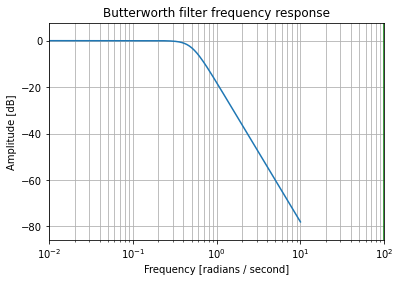

In [3]:
>>> plt.plot(w, 20 * np.log10(abs(h)))
>>> plt.xscale('log')
>>> plt.title('Butterworth filter frequency response')
>>> plt.xlabel('Frequency [radians / second]')
>>> plt.ylabel('Amplitude [dB]')
>>> plt.margins(0, 0.1)
>>> plt.grid(which='both', axis='both')
>>> plt.axvline(100, color='green') # cutoff frequency
>>> plt.show()

In [4]:
## Generate PAM Symbols with Eb=1.0
N=200
a=2*np.random.randint(2, size=N)-1.0  

In [5]:
## Overampling factor, i.e., number of samples per symbol period
M=64

In [6]:
## Transmitter Pulse Shaped Data
s=sig.upfirdn(h,a,M)
n2=np.arange(len(s))

In [7]:
## Receive Matched Filtered Data
r=sig.upfirdn(h,s)
n3=np.arange(len(r))

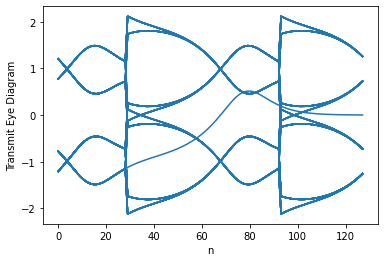

In [8]:
## Transmitter Eye Diagram

delay=int((len(h)-1)/2)
for k in range( math.floor( (len(s)-delay)/(2*M) ) ):
    plt.plot(np.real(s)[delay+k*2*M:delay+(k+1)*2*M],'C0-')
plt.xlabel('n')
plt.ylabel('Transmit Eye Diagram')
plt.show()

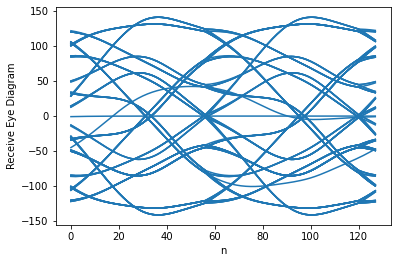

In [9]:
## Receiver Eye Diagram
delay=len(h)-1

for k in range( math.floor( (len(r)-delay)/(2*M) ) ):
    plt.plot(np.real(r)[delay+k*2*M:delay+(k+1)*2*M],'C0-')
plt.xlabel('n')
plt.ylabel('Receive Eye Diagram')
plt.show()